In [17]:
# Importar as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
# Importar os dados e vizualizar as primeiras linhas
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [19]:
# Visualizar as colunas do dataset
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [20]:
#Estatística descritiva
df['score'].describe()

count    7665.000000
mean        6.390411
std         0.968842
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

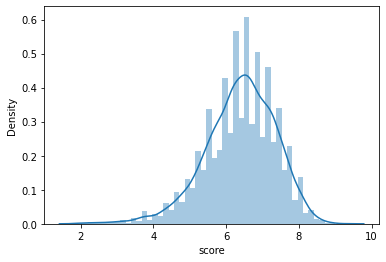

In [21]:
#Plotar um histograma
sns.distplot(df['score']);

In [22]:
# Calcular a Assimetria e a Curtose
print("Skewness: %f" % df['score'].skew())
print("Kurtosis: %f" % df['score'].kurt())

Skewness: -0.604433
Kurtosis: 0.892604


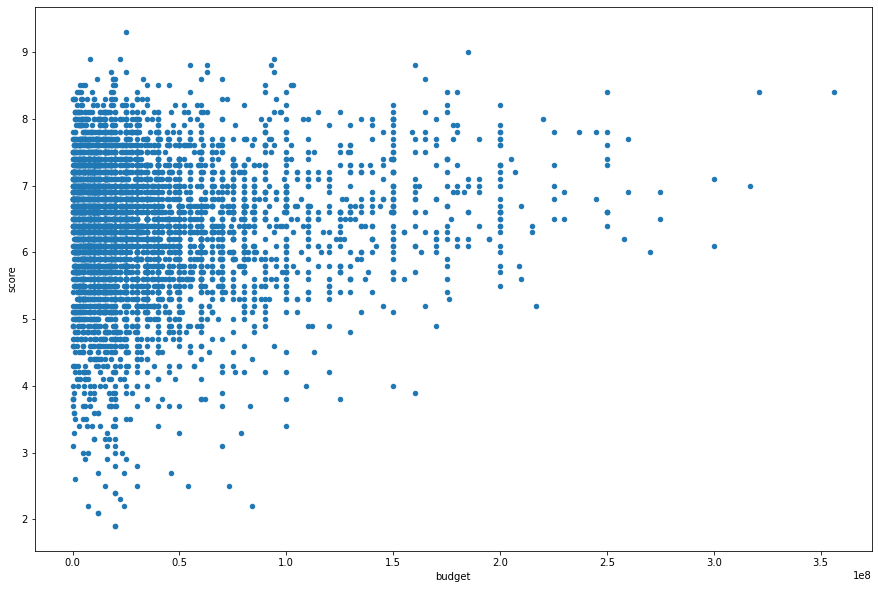

In [23]:
# Plotar o gráfico de dispersão budget/score
var = 'budget'
data = pd.concat([df['score'], df[var]], axis=1)
data.plot.scatter(x=var, y='score', figsize=(15,10));

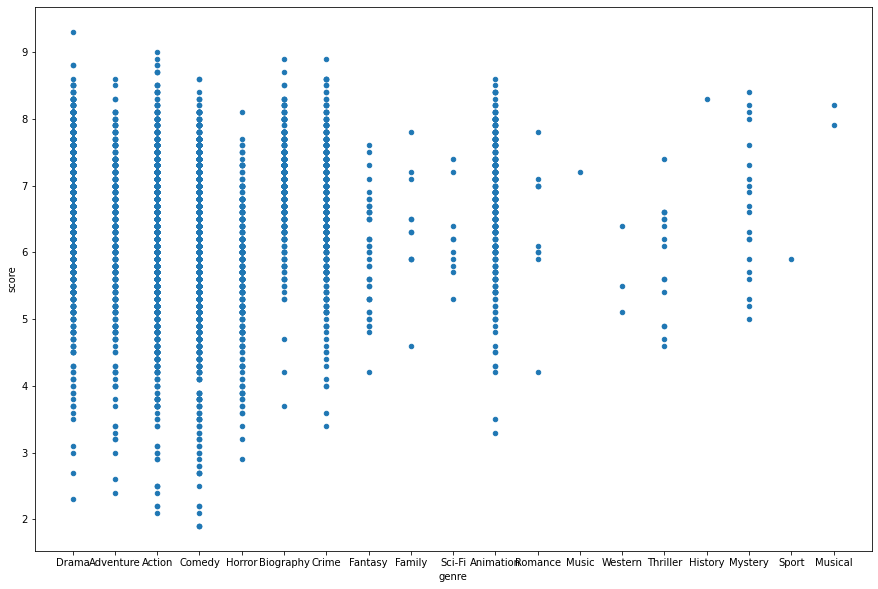

In [24]:
# Plotar o gráfico de dispersão genre/score
var = 'genre'
data = pd.concat([df['score'], df[var]], axis=1)
data.plot.scatter(x=var, y='score',figsize=(15,10));

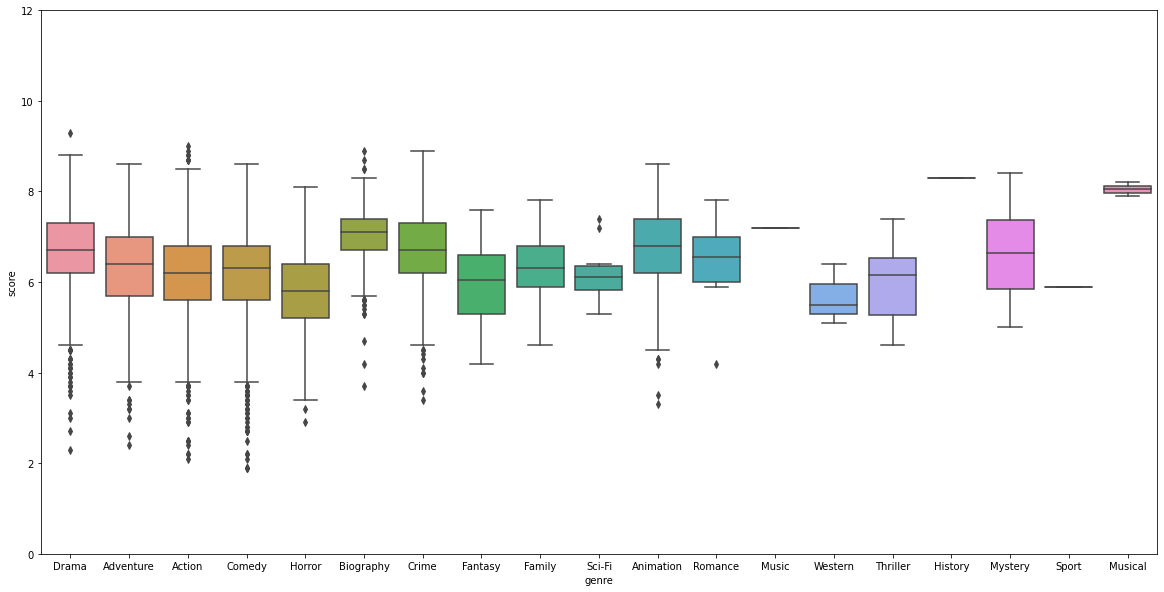

In [25]:
# Plotar o box plot genre/score
var = 'genre'
data = pd.concat([df['score'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="score", data=data)
fig.axis(ymin=0, ymax=12);

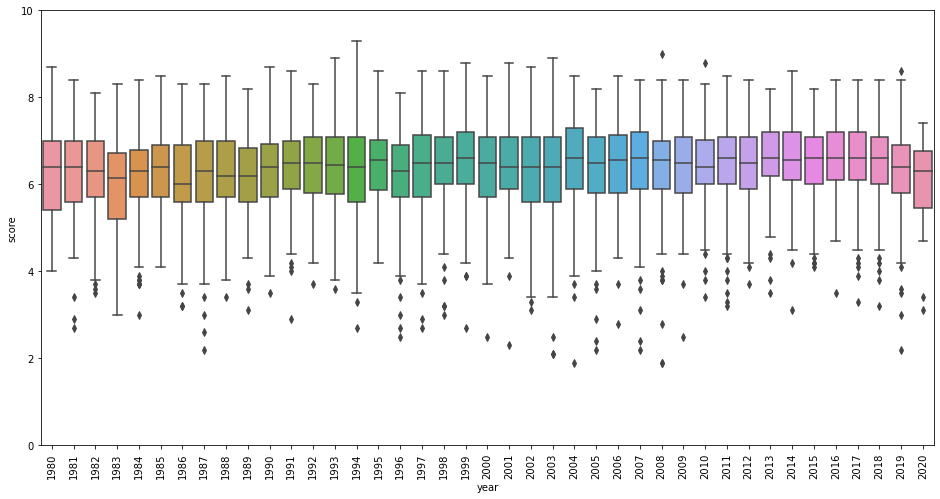

In [26]:
# Plotar o box plot year/score
var = 'year'
data = pd.concat([df['score'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="score", data=data)
fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90);

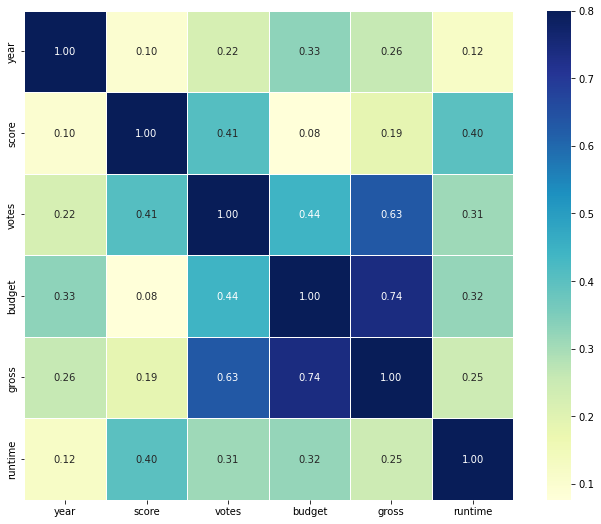

In [27]:
# Matriz de correlação
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, 
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu",
            vmax=.8, 
            square=True);

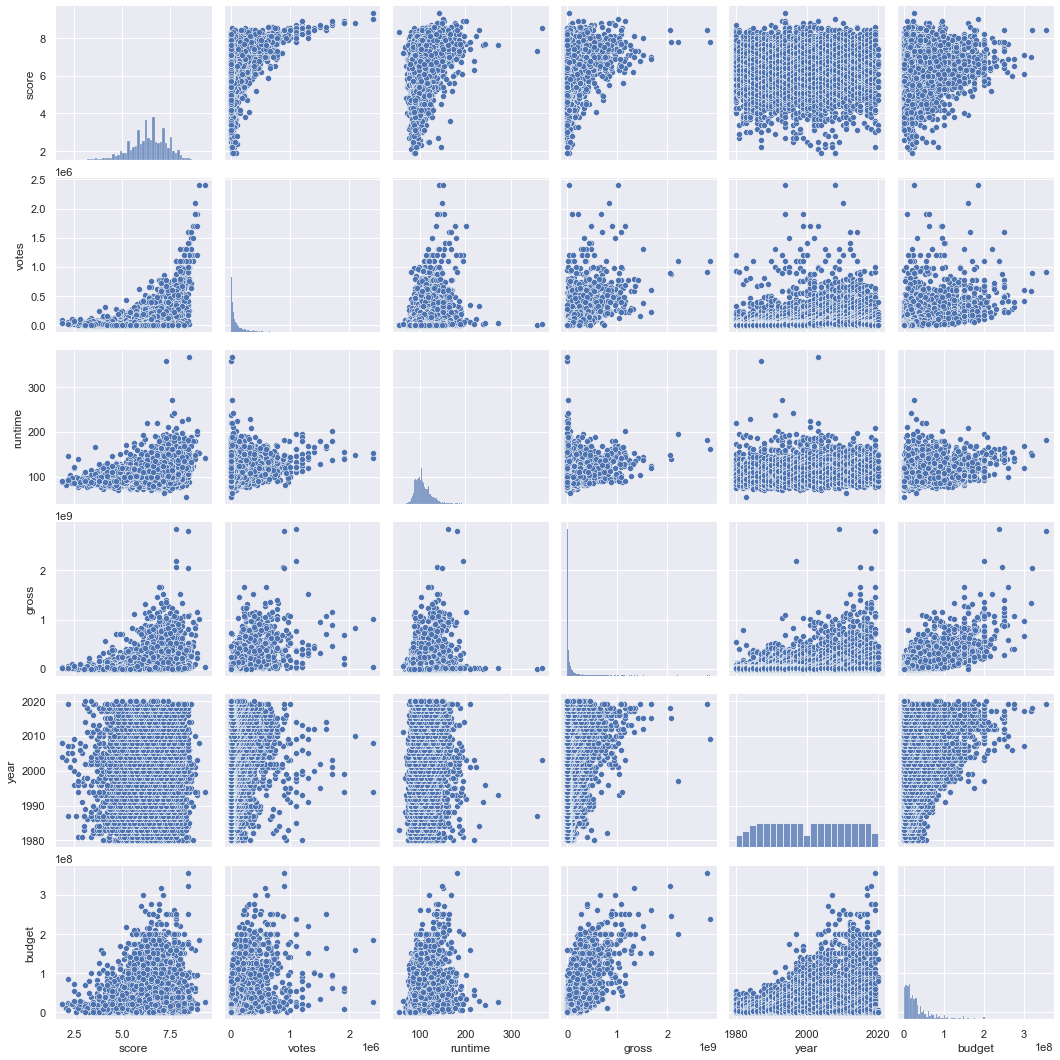

In [28]:
# Plotar os gráficos de dispersão para as correlações da matriz
sns.set()
cols = ['score', 'votes', 'runtime', 'gross', 'year', 'budget']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [29]:
# Averiguar se há dados faltantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
budget,2171,0.283125
gross,189,0.024648
rating,77,0.010042
company,17,0.002217
runtime,4,0.000522
score,3,0.000391
votes,3,0.000391
writer,3,0.000391
country,3,0.000391
released,2,0.000261


In [30]:
# Remover todas as linhas que contém dados faltantes
df.dropna(inplace=True)

In [31]:
# Averiguar se ainda há dados faltantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
name,0,0.0
rating,0,0.0
genre,0,0.0
year,0,0.0
released,0,0.0
score,0,0.0
votes,0,0.0
director,0,0.0
writer,0,0.0
star,0,0.0


In [32]:
df.isnull().sum().max() #apenas checando novamente...

0

In [33]:
# Normalização
score_scaled = StandardScaler().fit_transform(df['score'][:,np.newaxis]);
low_range = score_scaled[score_scaled[:,0].argsort()][:10]
high_range= score_scaled[score_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.66680157]
 [-4.66680157]
 [-4.45903984]
 [-4.45903984]
 [-4.35515897]
 [-4.35515897]
 [-4.35515897]
 [-4.2512781 ]
 [-4.14739723]
 [-4.14739723]]

outer range (high) of the distribution:
[[2.39709752]
 [2.50097839]
 [2.50097839]
 [2.50097839]
 [2.50097839]
 [2.60485926]
 [2.60485926]
 [2.60485926]
 [2.70874013]
 [3.02038274]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


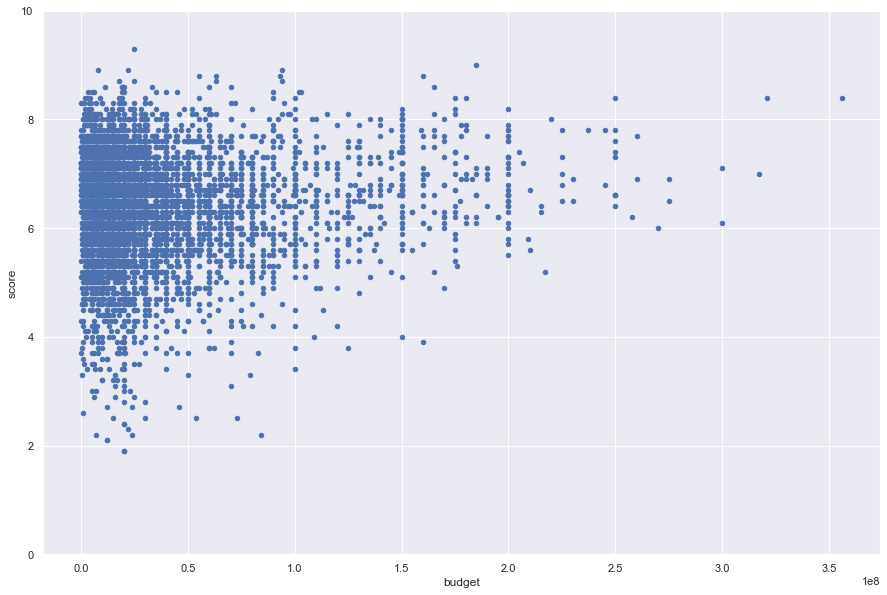

In [34]:
# Análise bivariada saleprice/grlivarea
var = 'budget'
data = pd.concat([df['score'], df[var]], axis=1)
data.plot.scatter(x=var, y='score', ylim=(0,10), figsize=(15,10));

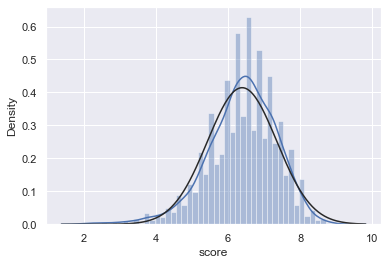

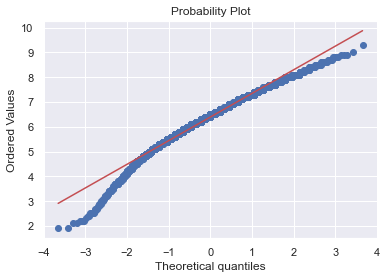

In [35]:
# Histograma da função densidade de probabilidade
sns.distplot(df['score'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['score'], plot=plt);